# Churn
El término Churn hace referencia a la cancelación de clientes, es decir, se refiere a los clientes que se dan de baja de una empresa en un periodo de tiempo determinado. Es una métrica indispensable a la hora de conocer el motivo de la pérdida de clientes y gracias a él, poder elaborar estrategias de marketing que te permitan obtener una mayor fidelización de clientes.

El problema del abandono de clientes es una constante en sectores en los que los clientes se tienen que suscribir o abonar a un determinado servicio como por ejemplo el sector de las telecomunicaciones. La insatisfacción del cliente o la alta rivalidad de la competencia se pueden presentar como dos de las principales causas de esta pérdida de clientes. Luchar contra este problema se antoja clave para poder lograr un servicio beneficioso para la compañía. Obtener un cliente nuevo puede ser mucho más complicado que retener a los actuales por lo que un alto abandono de clientes se convierte en un problema importante. Conseguir la fidelidad de los clientes tiene que ser un objetivo para todas las empresas de este tipo de sectores.

## 1. Importar el data set

In [101]:
import numpy as np
import pandas as pd

import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score, GridSearchCV

In [102]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [103]:
df.shape

(7043, 21)

##### Observacion 1.1: 
Hay un total de 7043 clientes. 

##### Observacion 1.2: 
Cada cliente es caracterizado por 20 variables independientes y 1 variable independiente que es la bandera Churn que indica si el cliente abandona la empresa o no (churn=Yes)

In [104]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [105]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

##### Observacion 1.3: 
Hay 6 variables independientes (gender, SeniorCitizen, Partner, Dependents, PhoneServices, PaperlessBilling) que contienen 2 clases (Yes/No, 0/1). 

##### Observacion 1.4: 
Hay 10 variables independientes (MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod) que contienen 3 o mas clases. 

Estas caracteristicas son categoricas ya que no presentan un valor real sino una categoria. En lo adelante estas variables independientes seran referenciadas como caracteristicas categoricas (de tener 2 clases seran caracteristicas categoricas binaras.)

##### Observacion 1.5: 
Hay 3 variables independientes (tenure, MontlyCharges, TotalCharges) que continenen valores reales.

Estas caracteristicas son continuas ya que representan valores numericos reales. En lo adelante estas varibles independientes seran referenciadas como variables continuas.

##### Observacion 1.6: 
La variable customerID no resulta de importancia ya que al parecer se refiere a la identificacion del cliente.

In [106]:
df.drop(['customerID'], axis=1, inplace=True)

## 2. Analisis Exploratorio (EDA)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [108]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##### Observacion 2.1: 
No hay presencia de valores nulos en el data set, esto puede suponer una simplificacion el proceso de limpieza y preparacion de datos ya que no es necesario tratar con valores faltantes, ademas puede simplificar la creacion y precision del modelo de Machine Learning (ML), esto no implica que se realice una exploracion exhaustiva para estar seguros que no hubo problemas en la recoleccion de datos. 

In [109]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

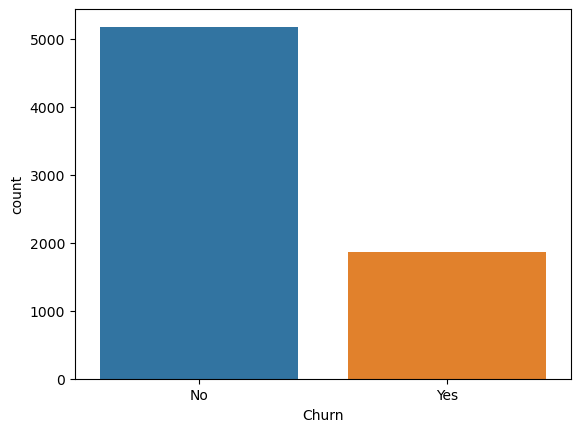

In [110]:
sns.countplot(data=df, x='Churn')

##### Observacion 2.2: 
La variable objetivo (Churn) se encuentra desbalanceada. La clase negativa (Churn=No) es mucho mas grande que la clase positiva (Churn=Yes), es posible que esa distribucion pueda influir de una forma negativa en el comportamiento del modelo de Machine Learning.

Tener una variable objetivo desbalanceada implica sesgo en la prediccion ya que el modelo puede tener dificultades para predecir correctamente la clase minoritaria (Churn=Yes) que es la de mayor importancia en el problema abordado. Para resolver esta problematica bien se pueden aplicar tecnicas de balanceo como el submuestreo de la clase mayoritaria o el sobremuestreo de la clase minoritaria.

In [111]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [112]:
binary_cols # Caracteristicas categoricas con 2 clases

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [113]:
# Caracteristicas categoricas con mas de 2 clases
multiple_cols_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

### Caracteristicas categoricas binarias

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

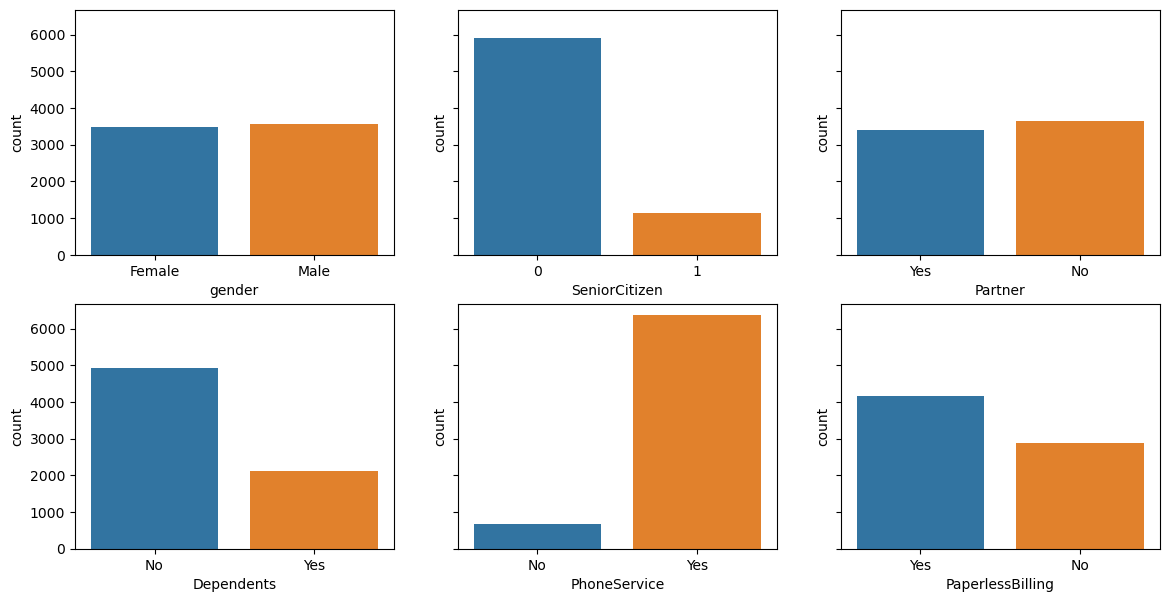

In [114]:
fig, axes = plt.subplots(2, 3, figsize=(14, 7), sharey=True)

sns.countplot(data=df, x='gender' , ax=axes[0,0])
sns.countplot(data=df, x='SeniorCitizen', ax=axes[0,1])
sns.countplot(data=df, x='Partner', ax=axes[0,2])
sns.countplot(data=df, x='Dependents', ax=axes[1,0])
sns.countplot(data=df, x='PhoneService', ax=axes[1,1])
sns.countplot(data=df, x='PaperlessBilling', ax=axes[1,2])

##### Observacion 2.3: 
Segun las graficas anteriores gran parte de los clientes no tiene la mayoria de edad y cuenta con un servicio telefonico. Tendran esto alguna repercusion en la tasa de abandono?

In [115]:
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [116]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [117]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


##### Observacion 2.3: 
Resulta complicado llegar a una conclusion apresurada de cuales serian las variables independientes que influyen en que un cliente tome la decision de abandonar la empresa, es necesario continuar con la exploracion y la creacion del modelo.

### Caracteristicas categoricas

<AxesSubplot:xlabel='Contract', ylabel='count'>

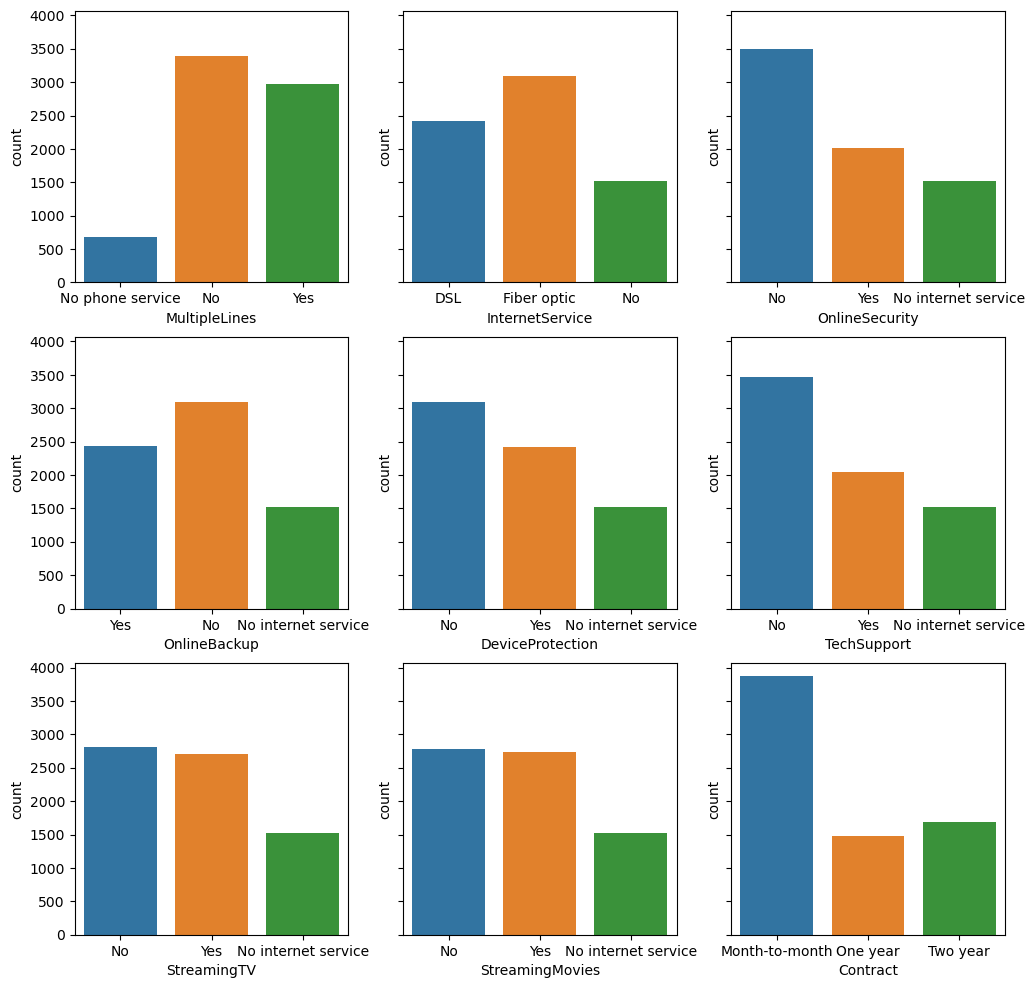

In [118]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharey=True)

sns.countplot(data=df, x='MultipleLines' , ax=axes[0,0])
sns.countplot(data=df, x='InternetService', ax=axes[0,1])
sns.countplot(data=df, x='OnlineSecurity', ax=axes[0,2])
sns.countplot(data=df, x='OnlineBackup', ax=axes[1,0])
sns.countplot(data=df, x='DeviceProtection', ax=axes[1,1])
sns.countplot(data=df, x='TechSupport', ax=axes[1,2])
sns.countplot(data=df, x='StreamingTV', ax=axes[2,0])
sns.countplot(data=df, x='StreamingMovies', ax=axes[2,1])
sns.countplot(data=df, x='Contract', ax=axes[2,2])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

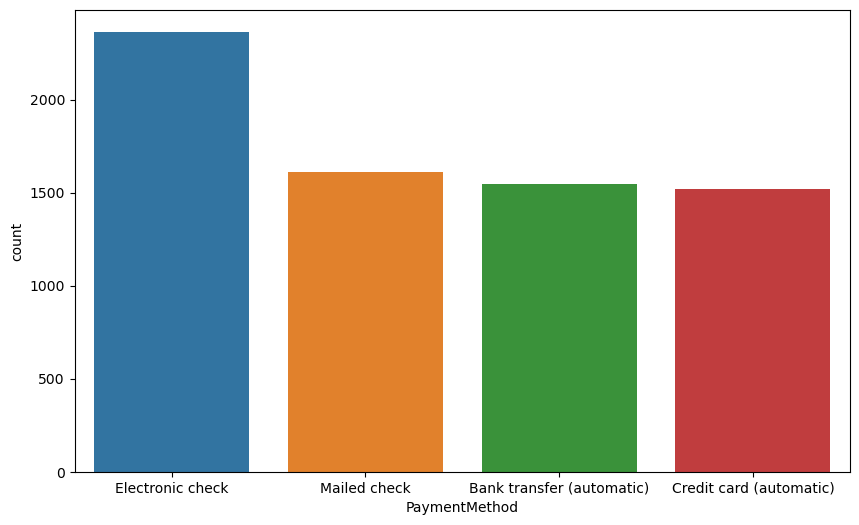

In [119]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='PaymentMethod')

### Variables continuas

In [120]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median()) 
df.dtypes 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

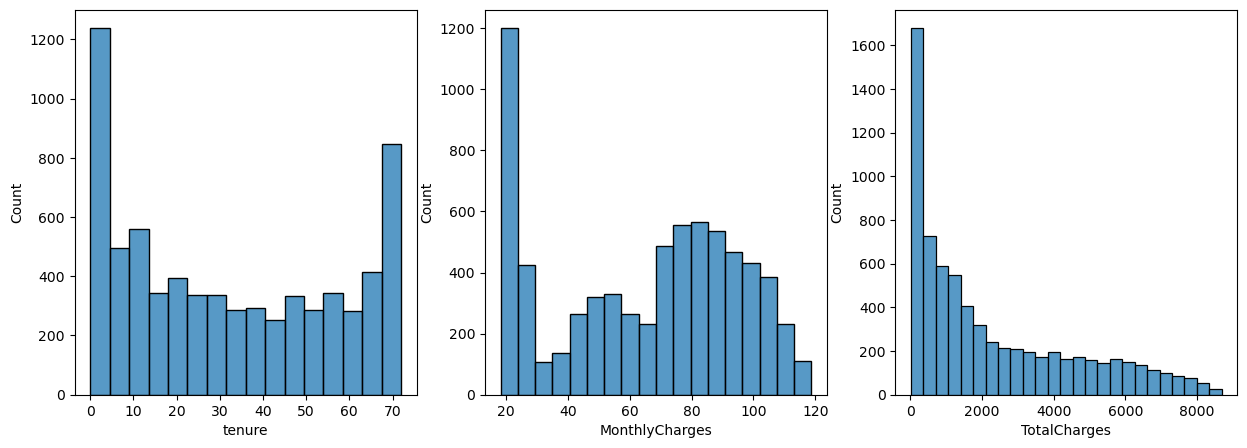

In [121]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

sns.histplot(df["tenure"], ax=axes[0])
sns.histplot(df["MonthlyCharges"], ax=axes[1])
sns.histplot(df["TotalCharges"], ax=axes[2])

## 3. Preprocesamiento de Datos

##### Observacion 3.1: 
Se hace necesario convertir las caracteristicas categoricas en numericas porque los modelos de Machine Learning trabajan con numeros. 

##### Observacion 3.2: 
Tambien se hace necesario escalar las variables continuas ya que variables con grandes valores daran mas importancia a las variables con valores mas altos, lo que afectaria la precision del modelo. 

In [122]:
gender_numeric = {'Male':1, 'Female':0}
df.gender.replace(gender_numeric, inplace=True)

In [123]:
PhoneService_numeric = {'Yes':1, 'No':0}
df.PhoneService.replace(PhoneService_numeric, inplace=True)

In [124]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Contract']
df_1 = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [125]:
df_1.head()

,gender,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0,1,0,29.85,29.85,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,0
1,1,34,1,56.95,1889.50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,2,1,53.85,108.15,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,45,0,42.30,1840.75,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,2,1,70.70,151.65,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [126]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
c = sc.fit_transform(df[['TotalCharges']])

df_1['tenure'] = a
df_1['MonthlyCharges'] = b
df_1['TotalCharges'] = c

df_1.shape

(7043, 31)

### Correlacion

(Nota: La correlacion se deberia hacer en el EDA antes de los ajsute MinMax Scaler o de ese tipo, pues te pueden falsear las correlaciones)

La correlacion mide la relacion lineal entre dos variables. Las caracteristicas con alta correlacion son mas linealmente dependientes y tienen casi el mismo efecto sobre la variable objetivo. Entonces cuando dos variables tienen una correlacion alta, podemos descartar una de ellas. 

Primeramente estudiaremos la correlación de las caracteristicas. Para esto aplicamos la correlación de spearman a dos dataframes:

1. Un primer dataframe con las caracteristicas y la variable objetivo con el objetivo de obtener las caracteristicas con la correlación mas alta con Churn.
2. Un segundo dataFrame solamente con las caracteristicas para determinar las caracteristicas mas correlacionadas entre ellas.

In [127]:
print(df_1.corr())

                                         gender    tenure  PhoneService  \
gender                                 1.000000  0.005106     -0.006488   
tenure                                 0.005106  1.000000      0.008448   
PhoneService                          -0.006488  0.008448      1.000000   
MonthlyCharges                        -0.014569  0.247900      0.247398   
TotalCharges                          -0.000002  0.825464      0.113013   
Churn                                 -0.008612 -0.352229      0.011942   
SeniorCitizen_1                       -0.001874  0.016567      0.008576   
Partner_Yes                           -0.001808  0.379697      0.017706   
Dependents_Yes                         0.010517  0.159712     -0.001762   
MultipleLines_No phone service         0.006488 -0.008448     -1.000000   
MultipleLines_Yes                     -0.008414  0.331941      0.279690   
InternetService_Fiber optic           -0.011286  0.019720      0.289999   
InternetService_No       

<AxesSubplot:>

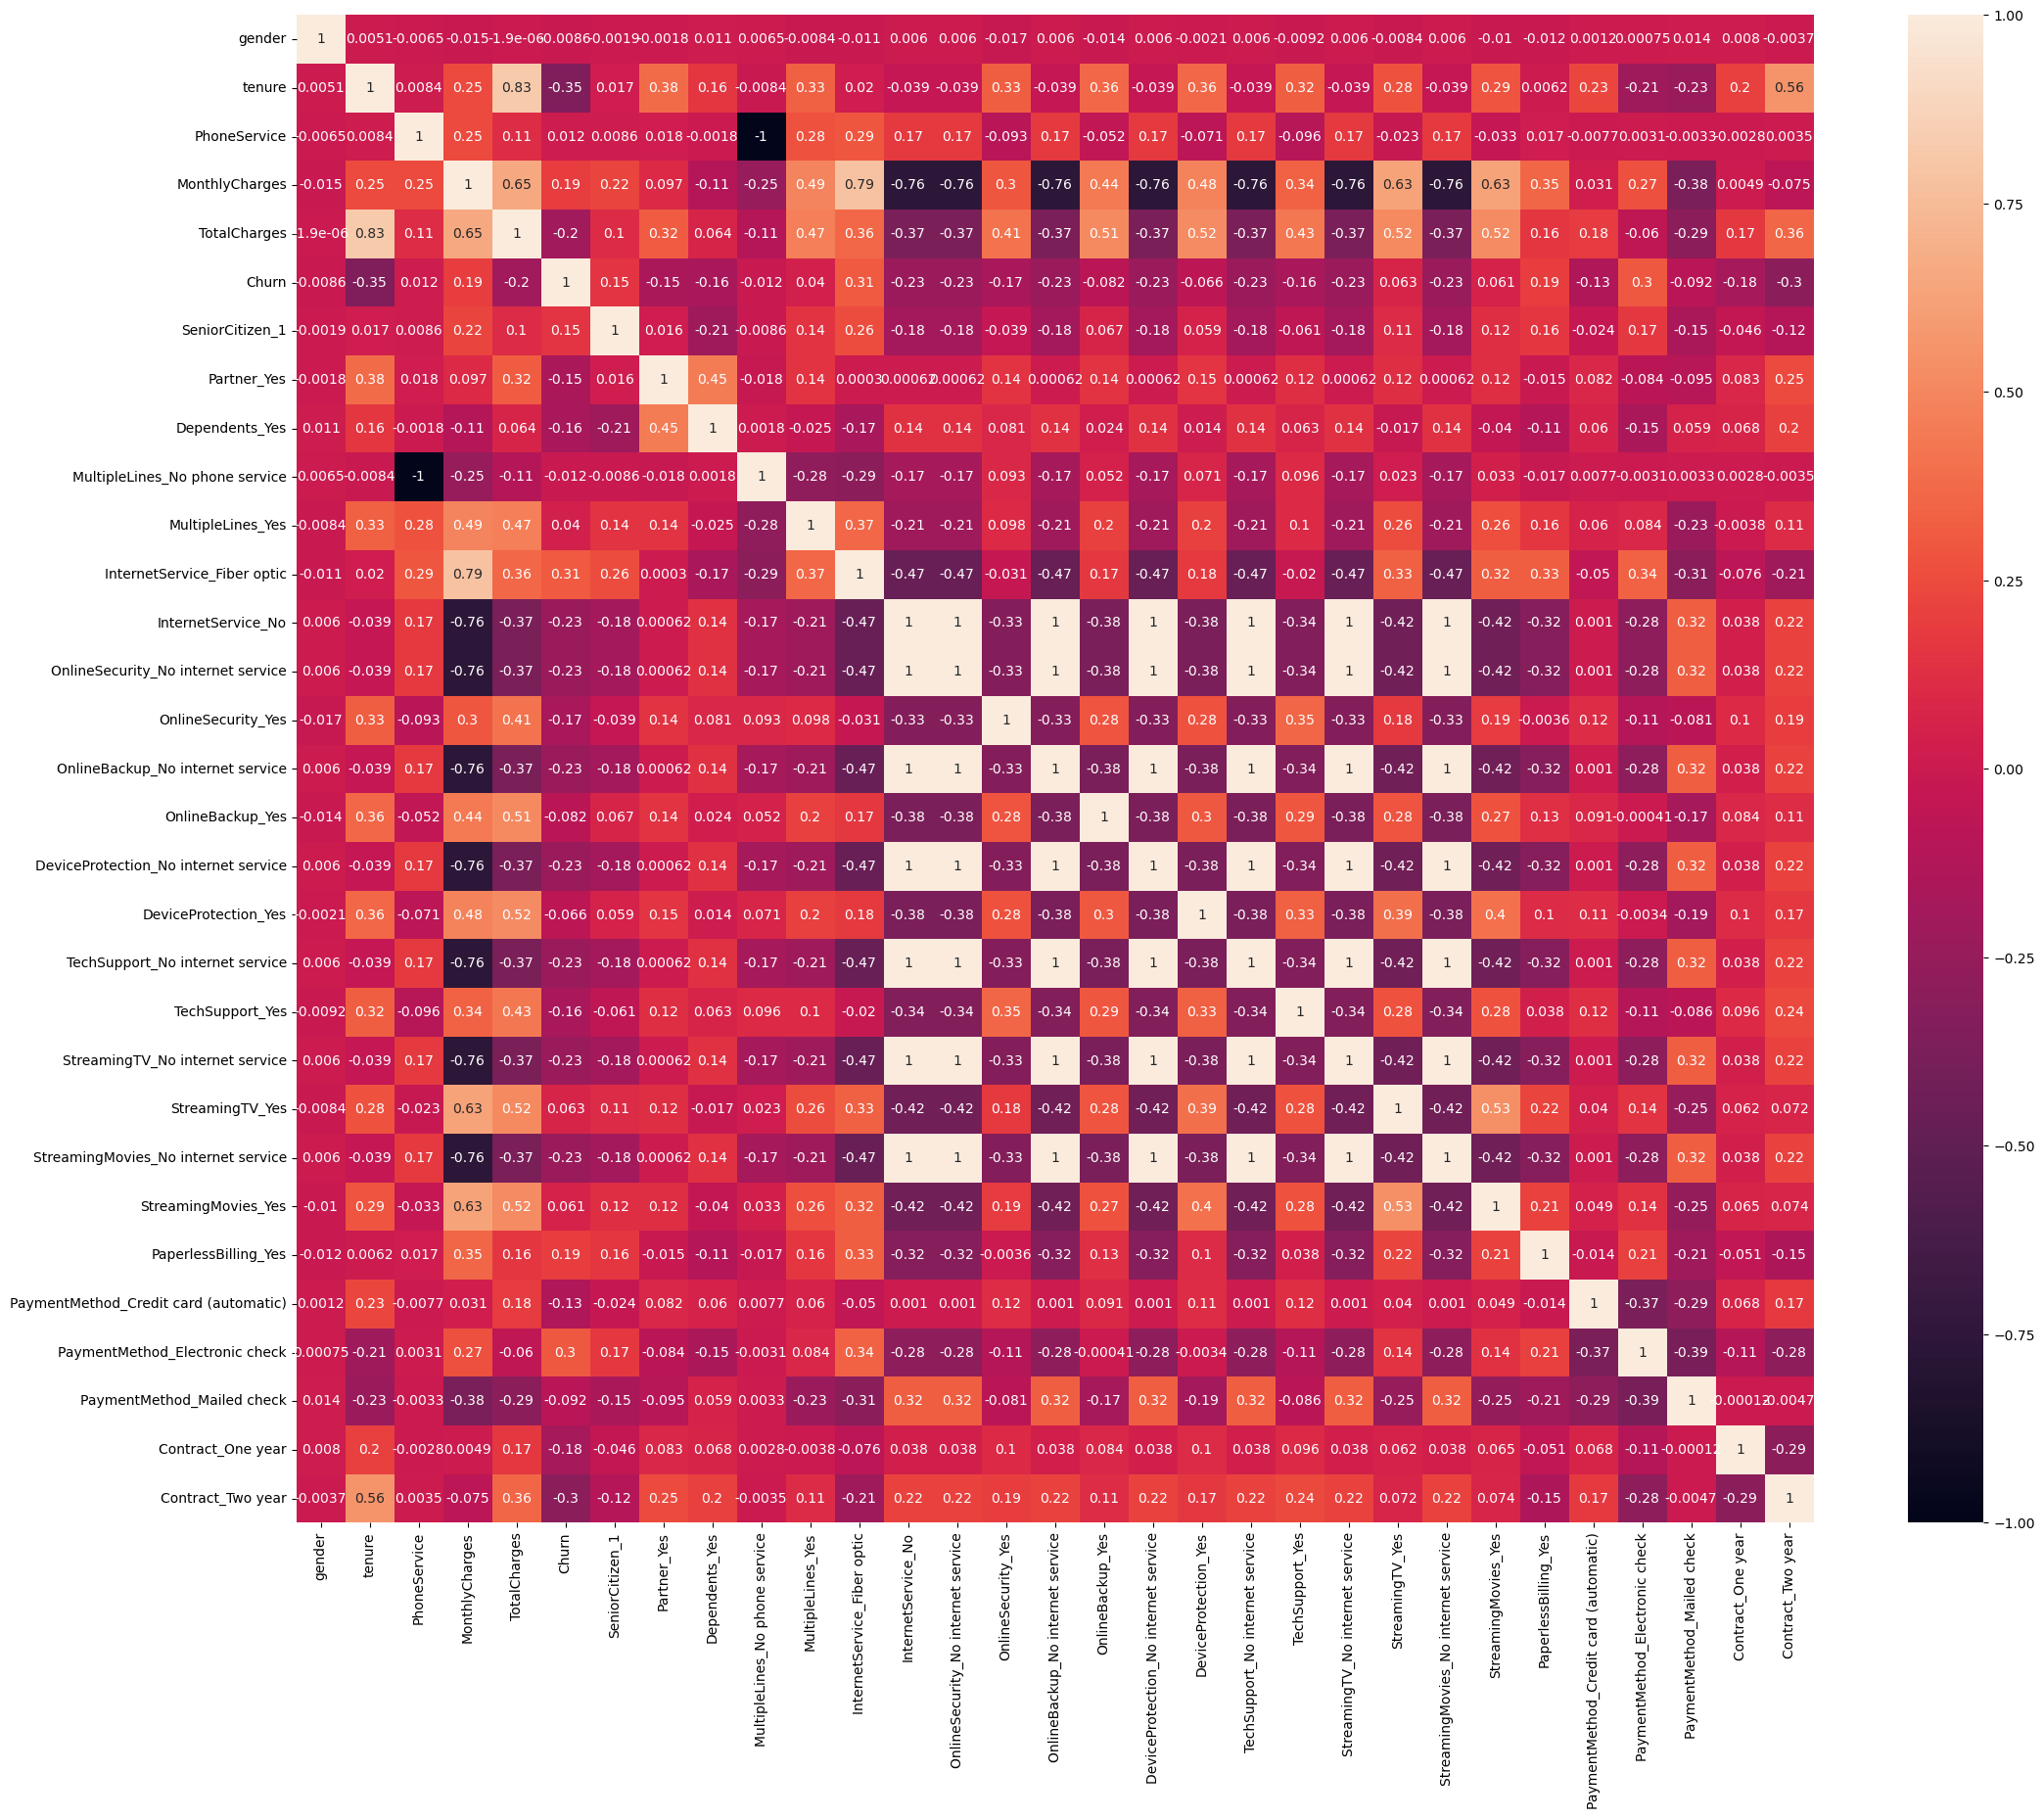

In [128]:
#Calcular la matriz de correlacion
corr_matrix = df_1.corr()

#Graficar la matriz de correlacion como un mapa de calor
plt.figure(figsize=(25,20))
sns.heatmap(corr_matrix, annot=True)

In [129]:
corr_matrix = df_1.corr(method='spearman')

correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(len(correlated_features), correlated_features)

7 {'StreamingTV_No internet service', 'OnlineSecurity_No internet service', 'MultipleLines_No phone service', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service', 'TechSupport_No internet service', 'StreamingMovies_No internet service'}


In [130]:
feat_matrix = df_1.drop('Churn', axis=1).corr(method='spearman')

corr_features = set()

for i in range(len(feat_matrix.columns)):
    for j in range(i):
        if abs(feat_matrix.iloc[i, j]) > 0.9:
            colname = feat_matrix.columns[i]
            corr_features.add(colname)

print(len(corr_features), corr_features)

7 {'StreamingTV_No internet service', 'OnlineSecurity_No internet service', 'MultipleLines_No phone service', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service', 'TechSupport_No internet service', 'StreamingMovies_No internet service'}


In [131]:
if correlated_features == corr_features:
    print("Coinciden")
else:
    print("No Coinciden")

Coinciden


In [132]:
MC_features = list(set(correlated_features) | set(corr_features))

print(len(MC_features), MC_features)

7 ['StreamingTV_No internet service', 'OnlineSecurity_No internet service', 'MultipleLines_No phone service', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service', 'TechSupport_No internet service', 'StreamingMovies_No internet service']


##### Observacion 3.3: 
Luego de realizar el analisis de las correlaciones se determina que las variables MultipleLines, TechSupport, OnlineSecurity, OnlineBackup, StreamingMovies, StreamingTV, DeviceProtection estan correlacionadas y afectaria esto en la creacion del modelo de Machine Learning.

In [133]:
df_2 = df_1.copy()

In [134]:
df_2.columns

Index(['gender', 'tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [135]:
df_2.drop(['MultipleLines_No phone service','MultipleLines_Yes'], axis=1, inplace=True)
df_2.drop(['OnlineSecurity_No internet service','OnlineSecurity_Yes'], axis=1, inplace=True)
df_2.drop(['TechSupport_No internet service', 'TechSupport_Yes'], axis=1, inplace=True)
df_2.drop(['OnlineBackup_No internet service', 'OnlineBackup_Yes'], axis=1, inplace=True)
df_2.drop(['StreamingTV_No internet service', 'StreamingTV_Yes'], axis=1, inplace=True)
df_2.drop(['StreamingMovies_No internet service', 'StreamingMovies_Yes'], axis=1, inplace=True)
df_2.drop(['DeviceProtection_No internet service', 'DeviceProtection_Yes'], axis=1, inplace=True)

df_2.head()

,gender,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
0,0,0.013889,0,0.115423,0.001275,0,0,1,0,0,0,1,0,1,0,0,0
1,1,0.472222,1,0.385075,0.215867,0,0,0,0,0,0,0,0,0,1,1,0
2,1,0.027778,1,0.354229,0.010310,1,0,0,0,0,0,1,0,0,1,0,0
3,1,0.625000,0,0.239303,0.210241,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0.027778,1,0.521891,0.015330,1,0,0,0,1,0,1,0,1,0,0,0


### Remuestreo

Como bien se concluyo en el inicio del analisis la variable objetivo presenta un desbalanceo en la distribucion de las clases y esto no es deseado para la creacion del modelo de Machine Learning. Se utilizara el metodo de sobremuestreo de la clase minoritaria lo cual significa aumentar el numero de muestras en esta clase seleccionando filas de manera aleatoria.

In [136]:
df_no = df_2[df_2.Churn == 0]
df_yes = df_2[df_2.Churn == 1]

print(len(df_no),len(df_yes))

5174 1869


In [137]:
df_yes_upsampled = df_yes.sample(n=len(df_no), replace=True, random_state=42)
print(len(df_yes_upsampled))

5174


In [138]:
df_upsampled = pd.concat([df_no, df_yes_upsampled], axis=0)

Text(0.5, 1.0, 'Distribucion de clases luego del sobremuestreo')

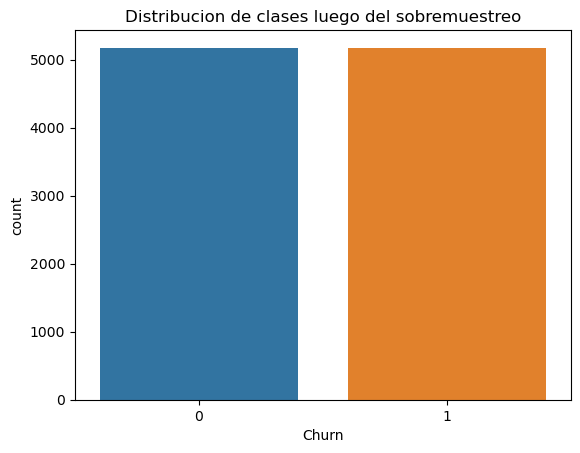

In [139]:
sns.countplot(data=df_upsampled, x='Churn').set_title('Distribucion de clases luego del sobremuestreo')

## 4. Modelos de ML

Luego de realizar una investigación sobre cuales podrian ser los modelos de Machine Learning que podrian responder eficientemente a la deteccion de la problematica en cuestion se determinan los siguientes modelos:

1. Regresion logisitica
2. Arbol de decision
3. Clasificador de bosque aleatorio 
4. Clasificador de maquina de aumento de gradiente

Seran entrenados los cuatro modelos de Machine Learning siguiendo una canalizacion de modelado estandar (standard modelling pipeline), que funciona de la siguiente manera: 
1) Se selecciona el modelo. 
2) Se ajustan cuidadosamente los hiperparametros con una combinacion de busqueda en cuadriculas (GridSearch) y validacion cruzada de 5 veces (5-fold cross validation).
3) Se evaluan los resultados. 

El desempeno de estos modelos sera evaluado en base a dos criterios: tiempo de entrenamiento y poder predictivo. El UAC es la metrica utilizada para medir el poder predictivo porque proporciona una buena medidada de la capacidad de un modelo para discriminar entre los clientes que abandonan y los que no.

In [140]:
X = df_upsampled.drop(['Churn'], axis=1) #Se seleccionan las variables independientes
y = df_upsampled['Churn'] #Se selecciona la variable dependiente u objetivo

In [141]:
col_names = X.columns

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [143]:
#Funcion para visualizar las metricas
def print_scores(algorit_name, y_true, y_pred):
    print(algorit_name)
    
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy:", acc_score)
    
    pre_score = precision_score(y_true, y_pred)
    print("precision:", pre_score)
    
    rec_score = recall_score(y_true, y_pred)
    print("recall:", rec_score)
    
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score:", f_score) 

### Entrenar los modelos

In [144]:
# Record script start time
script_start_time = time.process_time()

def model_pipeline(model, param_grid, x_train, Y_train):

    """
    Pipeline to train sklearn model using k-fold
    cross validation and grid search

    returns the best model and results for all
    traning runs

    parameters -
    model: an sklearn machine learning model
    param_gird: search space for grid search as dict

    """

    # Initialisa model with GridSearchCV or just GridSearch

    Tuned_Model = GridSearchCV(
        estimator=model, param_grid=param_grid, scoring="roc_auc", cv=5
    )

    # Fit model & Time the process for training the model
    print("Training Model")
    start_time = time.process_time()

    Tuned_Model.fit(x_train, Y_train)

    print("Finished training model")

    # End of fit time
    print(time.process_time() - start_time, "Seconds")

    return Tuned_Model, pd.DataFrame(Tuned_Model.cv_results_)

In [145]:
# Modelo #1: Regresion Logistica

# Entrena y evalua el modelo de regresion logistica
from sklearn.linear_model import LogisticRegression

# Crear el objeto de regresion logisitica
model = LogisticRegression(penalty="l2", solver="liblinear", class_weight="balanced")

# Establece los parametros de Grid Search
param_grid = {"C": [0.001, 0.01, 0.1, 1], "fit_intercept": [True, False]}

# Entrena el modelo y muestra los resultados
Tuned_LogReg, Results_LogReg = model_pipeline(model, param_grid, X_train, y_train)

Results_LogReg

Training Model
Finished training model
1.65625 Seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015083,0.001112,0.006168,0.003369,0.001,True,"{'C': 0.001, 'fit_intercept': True}",0.828820,0.823948,0.813688,0.827391,0.816608,0.822091,0.005958,8
1,0.013353,0.002863,0.000800,0.001599,0.001,False,"{'C': 0.001, 'fit_intercept': False}",0.829291,0.824186,0.814100,0.827326,0.816879,0.822356,0.005904,7
2,0.016486,0.003038,0.003609,0.001830,0.01,True,"{'C': 0.01, 'fit_intercept': True}",0.839932,0.835609,0.827630,0.835298,0.823963,0.832486,0.005819,5
3,0.012499,0.006250,0.003125,0.006251,0.01,False,"{'C': 0.01, 'fit_intercept': False}",0.839656,0.835552,0.827458,0.835462,0.823639,0.832353,0.005884,6
4,0.018749,0.006250,0.000000,0.000000,0.1,True,"{'C': 0.1, 'fit_intercept': True}",0.843697,0.838557,0.834609,0.836742,0.826486,0.836018,0.005635,3
5,0.015624,0.000002,0.006249,0.007654,0.1,False,"{'C': 0.1, 'fit_intercept': False}",0.842451,0.838776,0.833887,0.838070,0.824494,0.835535,0.006155,4
6,0.021873,0.007653,0.003125,0.006249,1,True,"{'C': 1, 'fit_intercept': True}",0.844625,0.839479,0.838040,0.838654,0.829096,0.837979,0.005016,1
7,0.018641,0.006308,0.002467,0.004934,1,False,"{'C': 1, 'fit_intercept': False}",0.842596,0.838810,0.836463,0.839862,0.824770,0.836500,0.006187,2


In [146]:
# Modelo #2: Arbol de decision

# Entrena y evalua el modelo de arbol de decision
from sklearn.tree import DecisionTreeClassifier

# Crear el objeto de arbol de decision
model = DecisionTreeClassifier(criterion="gini", class_weight="balanced")
# Establece los parametros de Grid Search
param_grid = {
    "max_depth": [5, 10, 30],
    "max_features": [0.1, 0.3, 0.7],
    "ccp_alpha": [0, 0.005, 0.01, 0.1],
}

# Entrena el modelo y muestra los resultados
Tuned_DecTree, Results_DecTree = model_pipeline(model, param_grid, X_train, y_train)

Results_DecTree

Training Model
Finished training model
2.921875 Seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007197,3.993754e-04,0.004442,0.000881,0,5,0.1,"{'ccp_alpha': 0, 'max_depth': 5, 'max_features...",0.750206,0.715839,0.803212,0.774013,0.784725,0.765599,0.030214,18
1,0.009966,6.552990e-03,0.001999,0.001673,0,5,0.3,"{'ccp_alpha': 0, 'max_depth': 5, 'max_features...",0.819282,0.818985,0.794267,0.802756,0.828809,0.812820,0.012497,8
2,0.012285,6.450310e-03,0.004149,0.005933,0,5,0.7,"{'ccp_alpha': 0, 'max_depth': 5, 'max_features...",0.831758,0.831390,0.835353,0.840959,0.823080,0.832508,0.005835,6
3,0.007467,1.435719e-03,0.004673,0.003743,0,10,0.1,"{'ccp_alpha': 0, 'max_depth': 10, 'max_feature...",0.832440,0.838136,0.820362,0.834061,0.824562,0.829912,0.006497,7
4,0.006250,7.655123e-03,0.006254,0.007659,0,10,0.3,"{'ccp_alpha': 0, 'max_depth': 10, 'max_feature...",0.830346,0.844734,0.832740,0.854100,0.842752,0.840934,0.008606,3
5,0.015624,2.442598e-06,0.003124,0.006248,0,10,0.7,"{'ccp_alpha': 0, 'max_depth': 10, 'max_feature...",0.838040,0.840185,0.834305,0.855888,0.835417,0.840767,0.007833,4
6,0.009375,7.654267e-03,0.006249,0.007653,0,30,0.1,"{'ccp_alpha': 0, 'max_depth': 30, 'max_feature...",0.828685,0.833751,0.843295,0.856078,0.828888,0.838140,0.010418,5
7,0.009376,7.655863e-03,0.000000,0.000000,0,30,0.3,"{'ccp_alpha': 0, 'max_depth': 30, 'max_feature...",0.835769,0.861417,0.838490,0.853409,0.844189,0.846655,0.009537,2
8,0.024993,7.640297e-03,0.000000,0.000000,0,30,0.7,"{'ccp_alpha': 0, 'max_depth': 30, 'max_feature...",0.854691,0.858367,0.844724,0.842631,0.841731,0.848429,0.006785,1
9,0.003125,6.250668e-03,0.006249,0.007653,0.005,5,0.1,"{'ccp_alpha': 0.005, 'max_depth': 5, 'max_feat...",0.716367,0.730530,0.761594,0.734009,0.709384,0.730377,0.018026,24


In [147]:
# Modelo #3: Clasificador de bosque aleatorio

# Entrena y evalua el modelo de clasificador de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier

# Crear el objeto de clasificador de bosque aleatorio
model = RandomForestClassifier(class_weight="balanced_subsample", bootstrap=True)

# Establece los parametros de Grid Search
param_grid = {
    "n_estimators": [200, 300, 400, 500, 600],
    "max_features": [0.1, 0.3, 0.6],
}

# Entrena el modelo y muestra los resultados
Tuned_RandomForest, Results_RandForest = model_pipeline(
    model, param_grid, X_train, y_train
)

Results_RandForest

Training Model
Finished training model
288.609375 Seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.481369,0.184871,0.091645,0.007122,0.1,200,"{'max_features': 0.1, 'n_estimators': 200}",0.937613,0.950630,0.935351,0.953836,0.941399,0.943766,0.007250,15
1,2.247836,0.161632,0.141388,0.010807,0.1,300,"{'max_features': 0.1, 'n_estimators': 300}",0.937399,0.951639,0.934337,0.955567,0.941638,0.944116,0.008181,14
2,2.598868,0.009923,0.175386,0.006098,0.1,400,"{'max_features': 0.1, 'n_estimators': 400}",0.939122,0.951270,0.934720,0.955169,0.942117,0.944480,0.007615,13
3,3.255861,0.014887,0.225386,0.007756,0.1,500,"{'max_features': 0.1, 'n_estimators': 500}",0.937324,0.952221,0.936036,0.955511,0.941900,0.944599,0.007883,12
4,3.960145,0.101306,0.315788,0.099883,0.1,600,"{'max_features': 0.1, 'n_estimators': 600}",0.938972,0.952569,0.936155,0.955667,0.942318,0.945136,0.007652,11
5,1.632729,0.012209,0.087498,0.007660,0.3,200,"{'max_features': 0.3, 'n_estimators': 200}",0.943698,0.955217,0.939090,0.957938,0.948459,0.948881,0.007001,4
6,2.442817,0.017974,0.131443,0.007497,0.3,300,"{'max_features': 0.3, 'n_estimators': 300}",0.943802,0.955675,0.939938,0.958612,0.947286,0.949063,0.007057,2
7,3.313931,0.068260,0.172563,0.001401,0.3,400,"{'max_features': 0.3, 'n_estimators': 400}",0.944154,0.954839,0.939595,0.958203,0.947524,0.948863,0.006824,5
8,4.113061,0.040198,0.215611,0.006251,0.3,500,"{'max_features': 0.3, 'n_estimators': 500}",0.944336,0.956097,0.938551,0.958822,0.947356,0.949032,0.007489,3
9,4.910970,0.009909,0.262559,0.005846,0.3,600,"{'max_features': 0.3, 'n_estimators': 600}",0.944453,0.955814,0.939744,0.959010,0.947153,0.949235,0.007157,1


In [148]:
# Modelo #4: Clasificador de maquina de aumento de gradiente

# Entrena y evalua el modelo de clasificador de bosque aleatorio
from sklearn.ensemble import GradientBoostingClassifier

# Crear el objeto de clasificador de maquina de aumento de gradiente
model = GradientBoostingClassifier()

# Establece los parametros de Grid Search
param_grid = {
    "n_estimators": [300],
    "max_depth": [5, 10, 30],
    "learning_rate": [0.01, 0.05, 0.1],
}

# Entrena el modelo y muestra los resultados
Tuned_GBM, Results_GBM = model_pipeline(model, param_grid, X_train, y_train)

Results_GBM

Training Model
Finished training model
443.21875 Seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.363587,0.040473,0.018750,6.249499e-03,0.01,5,300,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.857917,0.865556,0.861424,0.867914,0.860537,0.862670,0.003592,9
1,9.611936,0.210671,0.037505,7.650490e-03,0.01,10,300,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.913626,0.923537,0.905959,0.917930,0.914315,0.915073,0.005754,4
2,18.006951,0.140913,0.056255,7.655123e-03,0.01,30,300,"{'learning_rate': 0.01, 'max_depth': 30, 'n_es...",0.871610,0.876471,0.857966,0.880359,0.872244,0.871730,0.007572,8
3,3.331063,0.014176,0.012502,6.251240e-03,0.05,5,300,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.882906,0.894215,0.887844,0.897532,0.886704,0.889840,0.005295,6
4,8.548121,0.088972,0.031459,4.160892e-04,0.05,10,300,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.938769,0.949077,0.932494,0.941735,0.939382,0.940291,0.005352,2
5,17.975507,0.155135,0.059576,5.854989e-03,0.05,30,300,"{'learning_rate': 0.05, 'max_depth': 30, 'n_es...",0.877877,0.873785,0.858296,0.892007,0.867151,0.873823,0.011249,7
6,3.328133,0.006471,0.015625,8.971638e-07,0.1,5,300,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.900630,0.913554,0.901874,0.914963,0.904532,0.907110,0.005987,5
7,8.329388,0.119843,0.028127,6.249810e-03,0.1,10,300,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.947583,0.956635,0.934139,0.948560,0.943486,0.946081,0.007337,1
8,13.906220,0.140633,0.050000,6.248474e-03,0.1,30,300,"{'learning_rate': 0.1, 'max_depth': 30, 'n_est...",0.923341,0.933628,0.921732,0.938576,0.925512,0.928558,0.006468,3


### Evaluar los resultados

In [149]:
# Transform and compile model results
def bestmodel(data, modelname):

    """
    Function geneates best results from each model training
    run.
    data: model result as pandas data frame (from GridSearchCv)
    modelname: name of model used as str

    """

    bestmodel = data.loc[data.rank_test_score == 1].copy()
    bestmodel["score"] = "AUC"
    keep = [
        "split0_test_score",
        "split1_test_score",
        "split2_test_score",
        "split3_test_score",
        "split4_test_score",
        "score",
    ]
    bestmodel_a = bestmodel[keep].copy()
    bestmodel_a.set_index("score", inplace=True)
    bestmodel_b = bestmodel_a.T
    bestmodel_b["model"] = modelname
    bestmodel_c = dict(bestmodel_b)
    return bestmodel_b


# Set up lists of model results and model names
data = [Results_LogReg, Results_DecTree, Results_RandForest, Results_GBM]
modelname = ["LogReg", "DecTree", "RandForest", "GBM"]
allbestmodels = pd.DataFrame()

# Lopp through list of models and model names
for df, model in zip(data, modelname):
    mod = bestmodel(df, model)

    # concatenate into single table
    allbestmodels = pd.concat([allbestmodels, mod], axis=0)

# Reset index for plotting
allbestmodels.reset_index(inplace=True)

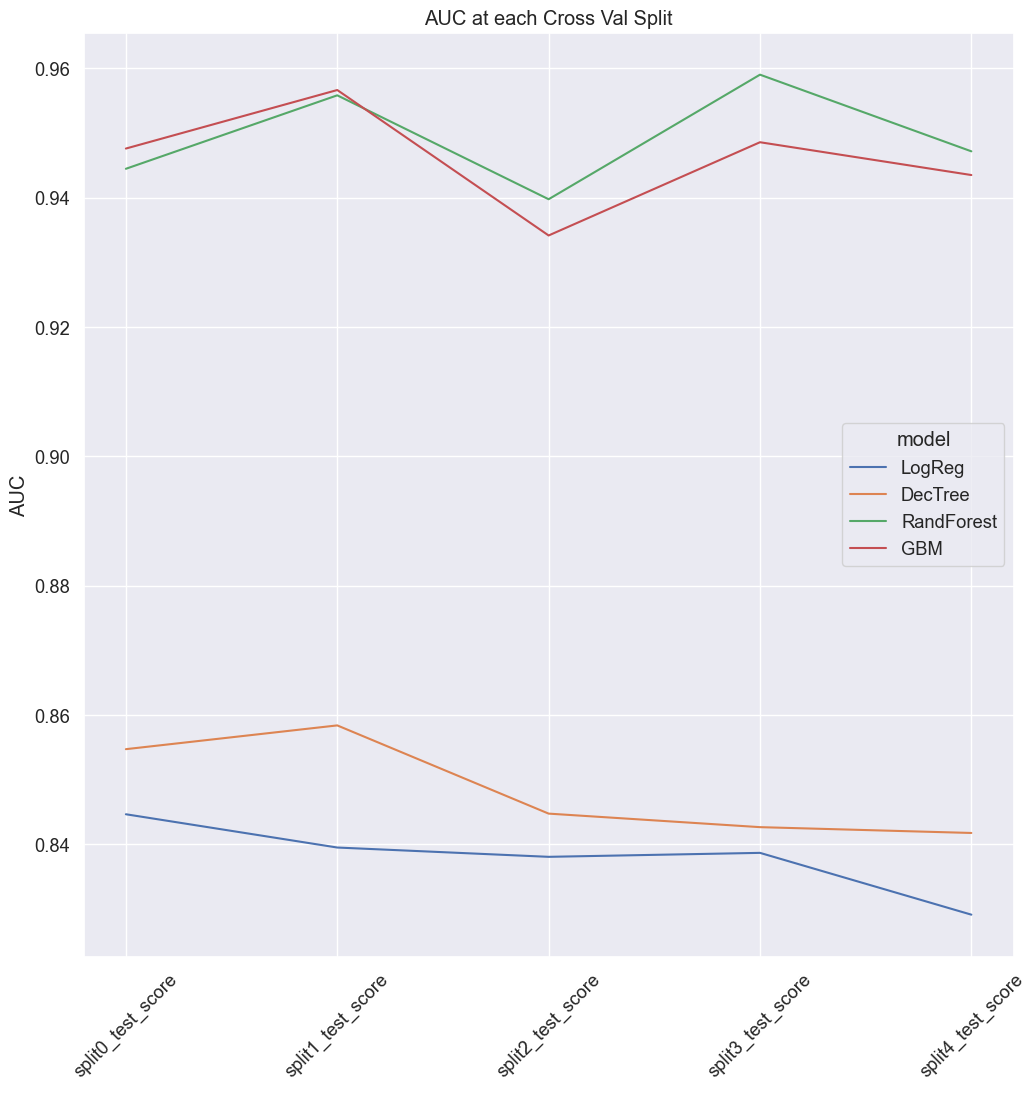

In [150]:
# Plot gendr distirbutions accross churn flags
sns.set(font_scale=1.2)
sns.set_style("darkgrid")
plt.figure(figsize=(12, 12))
ax = sns.lineplot(
    y=allbestmodels["AUC"],
    x=allbestmodels["index"],
    hue=allbestmodels["model"],
    ci="sd",
)
ax.tick_params(axis="x", labelrotation=45)
ax.set_title("AUC at each Cross Val Split")
ax.set_xlabel(" ")
plt.savefig("ModelEval")
plt.show()

### Evaluar el los resultados de la prediccion

#### Poder de prediccion
En terminos de rendimiento predictivo (UAC), el Clasificador de bosque aleatorio (Random Forest) supera a los demas modelos con un AUC medio de 0.946. La regresion logistica tuvo un desempeño deficiente y arrojo un AUC de 0.838.

#### Velocidad de entrenamiento
Random Forest fue el que mejor se desempeño en terminos de poder predictivo, la velocidad de entrenamiento fue de cerca de 5 minutos. El Clasificador de maquina de aumento de gradiente (GBM), segundo mejor modelo en poder predictivo, tomo casi el doble de tiempo. 

Por otra parte los modelos arboles de decisiones y regresion logisitica se entrenaron en menos de 5 segundos, sin embargo la susceptibilidad al sobreajuste y el rendimiento predictivo deficiente hacen que estas opciones no sean adecuadas para el uso comercial.

### Mejor modelo 
El modelo de bosques aleatorios brinda un excelente rendimiento predictivo y una robustez frente al sobreajuste que sera un punto importante a tener en cuenta para un modelo de produccion. 

### Definir las caracteristicas de mayor peso

In [151]:
def feature_importances(model, col_names):
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    print("Feature ranking:")

    for f in range(len(indices)):
        print("%d. %s (%f)" % (f + 1, col_names[indices[f]], importances[indices[f]]))
    
    return indices

In [152]:
model_RF = RandomForestClassifier(n_estimators=500, max_features=0.3)
model_RF.fit(X_train,y_train)
indices = feature_importances(model_RF,col_names)

Feature ranking:
1. TotalCharges (0.224261)
2. MonthlyCharges (0.208949)
3. tenure (0.192221)
4. Contract_Two year (0.073543)
5. InternetService_Fiber optic (0.055780)
6. PaymentMethod_Electronic check (0.040440)
7. Contract_One year (0.031918)
8. gender (0.026700)
9. PaperlessBilling_Yes (0.025636)
10. InternetService_No (0.024686)
11. Partner_Yes (0.022317)
12. Dependents_Yes (0.019833)
13. SeniorCitizen_1 (0.018752)
14. PaymentMethod_Credit card (automatic) (0.014019)
15. PaymentMethod_Mailed check (0.012723)
16. PhoneService (0.008222)


##### Observacion 4.1:
Se puede concluir que las caracteristicas independientes a evaluar para enfrentar en Churn por nivel de importancia son:
1. TotalCharges
2. MonthlyCharges
3. tenure 
4. Contract
5. InternetService



In [153]:
# End of fit time
print("Script run time end to end")
print(time.process_time() - script_start_time, "Seconds")

Script run time end to end
741.28125 Seconds
